## Лабораторная работа №6. Кластеризация (DBSCAN, OPTICS)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Загрузка данных

In [2]:
data = pd.read_csv('CC GENERAL.csv').iloc[:,1:].dropna()

In [3]:
no_labeled_data = pd.DataFrame(data=data.values)
no_labeled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0


### DBSCAN

In [4]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

KMeans(n_clusters=3, n_init=15)

In [5]:
data = np.array(data, dtype='float')
min_max_scaler = StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)

In [6]:
clustering = DBSCAN().fit(scaled_data)
print(set(clustering.labels_))
print(len(set(clustering.labels_)) - 1)
print(list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1}
36
0.7512737378415933


In [7]:
eps_range = np.arange(0.5, 3, 0.2)

clust_n = []
clust_failure = []

for eps in eps_range:
    clustering = DBSCAN(eps=eps).fit(scaled_data)
    clust_n.append(len(set(clustering.labels_)) - 1)
    clust_failure.append(100 * list(clustering.labels_).count(-1) /len(list(clustering.labels_)))

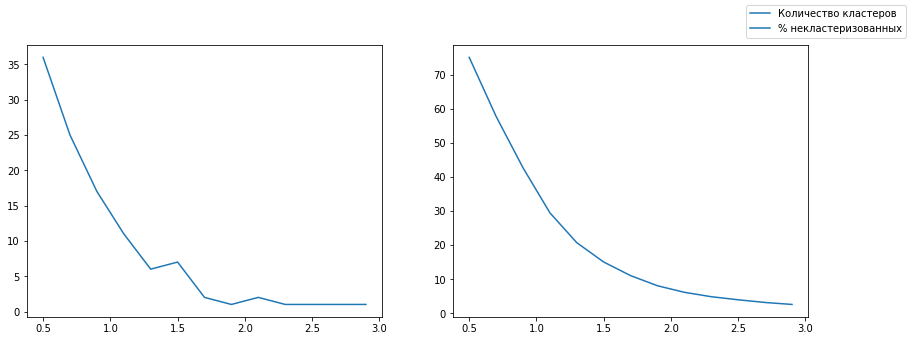

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(eps_range, clust_n, label="Количество кластеров")
ax[1].plot(eps_range, clust_failure, label='% некластеризованных')
fig.legend()

In [9]:
min_samples_range = range(1, 15)

clust_n = []
clust_failure = []

for min_samples in min_samples_range:
    clustering = DBSCAN(min_samples=min_samples).fit(scaled_data)
    clust_n.append(len(set(clustering.labels_)) - 1)
    clust_failure.append(100 * list(clustering.labels_).count(-1) /len(list(clustering.labels_)))

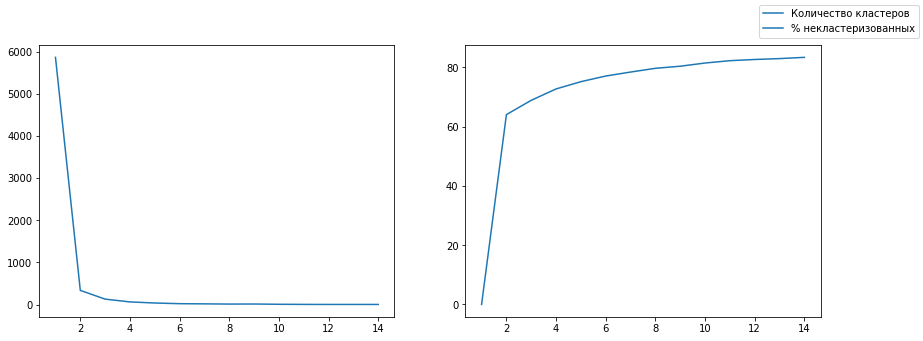

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(min_samples_range, clust_n, label="Количество кластеров")
ax[1].plot(min_samples_range, clust_failure, label='% некластеризованных')
fig.legend()

Определите значения параметров, при котором количество кластеров получается от 5 до 7, и процент не кластеризованных наблюдений не превышает 12%.

In [11]:
samples = np.arange(1, 8, 1)
eps_range = np.arange(0.5, 3, 0.1)
info = {}
for sample in samples:
    for eps in eps_range:
        clustering = DBSCAN(eps=eps ,min_samples=sample, n_jobs=-1).fit(scaled_data)
        labels_set = set(clustering.labels_)
        info[(sample, eps)]= [len(labels_set) - 1, list(clustering.labels_).count(-1) / len(list(clustering.labels_))]

for key, value in info.items():
    if value[0]>=5 and value[0]<=7 and value[1]<=0.12:
        print(key, value)

(3, 1.9999999999999996) [6, 0.06287633163501621]
(3, 2.5999999999999996) [5, 0.030917091245947197]
(3, 2.6999999999999993) [5, 0.027095877721167207]
(3, 2.8999999999999995) [5, 0.0222325150532654]
(4, 1.6999999999999997) [5, 0.1024779990736452]


In [12]:
pca_data = PCA(n_components=2).fit_transform(data)

In [13]:
clustering = DBSCAN(eps=1, min_samples=5).fit(scaled_data)
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(n_clusters_)
print(n_noise_)

19
3051


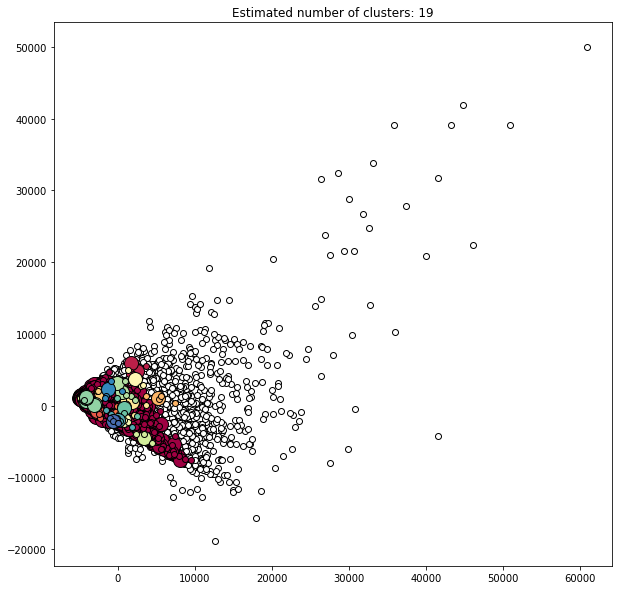

In [14]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

xy = pca_data[(labels == -1)]
plt.figure(figsize=(10, 10))
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor='w',
         markeredgecolor='k', markersize=6)

for k, col in zip(unique_labels, colors):
    if k == -1:
        continue

    class_member_mask = (labels == k)

    xy = pca_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### OPTICS

Найдите такие параметры метода OPTICS (max_eps и min_samples), чтобы получить результаты близкие к результатам DBSCAN

In [15]:
clustering = DBSCAN(eps=1.5, min_samples=5).fit(scaled_data)

labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(n_clusters_)
print(n_noise_)

7
1297


In [16]:
clustering = OPTICS(max_eps=1.5, min_samples=5, cluster_method='dbscan').fit(scaled_data)

labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(n_clusters_)
print(n_noise_)

7
1307


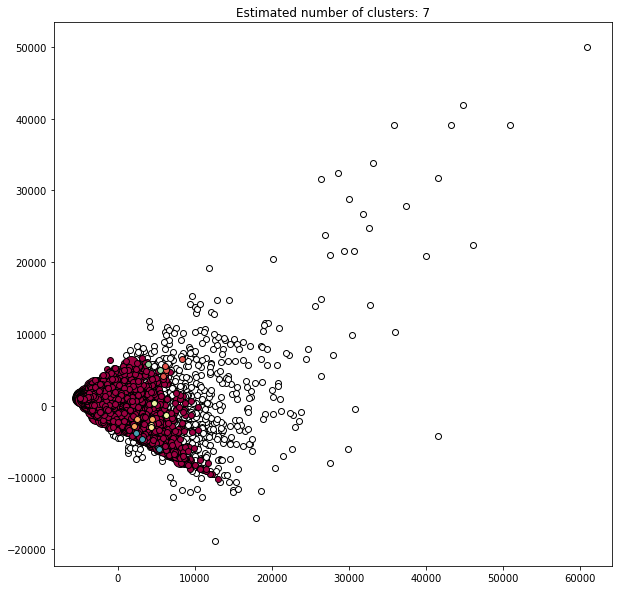

In [17]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

xy = pca_data[(labels == -1)]
plt.figure(figsize=(10, 10))
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor='w',
         markeredgecolor='k', markersize=6)

for k, col in zip(unique_labels, colors):
    if k == -1:
        continue

    class_member_mask = (labels == k)

    xy = pca_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

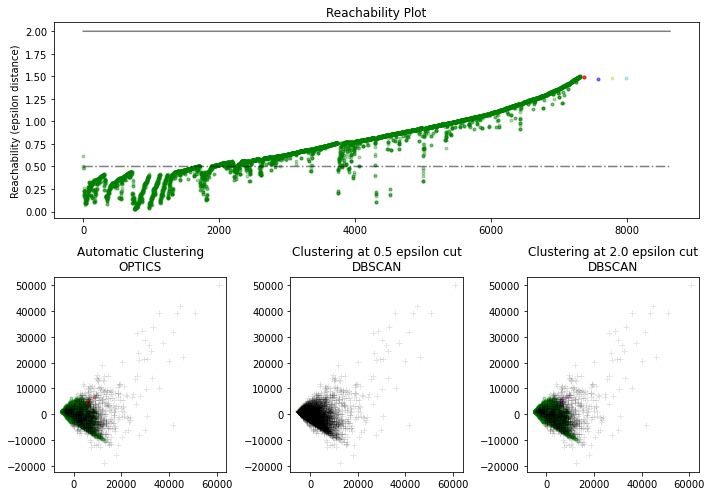

In [21]:
from sklearn.cluster import cluster_optics_dbscan
import matplotlib.gridspec as gridspec

def show_optics(clust):

    labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=0.5)
    labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=2)

    space = np.arange(len(scaled_data))
    reachability = clust.reachability_[clust.ordering_]
    labels = clust.labels_[clust.ordering_]

    plt.figure(figsize=(10, 7))
    G = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(G[0, :])
    ax2 = plt.subplot(G[1, 0])
    ax3 = plt.subplot(G[1, 1])
    ax4 = plt.subplot(G[1, 2])

    # Reachability plot
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    for klass, color in zip(range(0, 5), colors):
        Xk = space[labels == klass]
        Rk = reachability[labels == klass]
        ax1.plot(Xk, Rk, color, alpha=0.3)
    ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
    ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
    ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
    ax1.set_ylabel('Reachability (epsilon distance)')
    ax1.set_title('Reachability Plot')

    # OPTICS
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    for klass, color in zip(range(0, 5), colors):
        Xk = pca_data[clust.labels_ == klass]
        ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax2.plot(pca_data[clust.labels_ == -1, 0], pca_data[clust.labels_ == -1, 1], 'k+', alpha=0.1)
    ax2.set_title('Automatic Clustering\nOPTICS')

    # DBSCAN at 0.5
    colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
    for klass, color in zip(range(0, 6), colors):
        Xk = pca_data[labels_050 == klass]
        ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
    ax3.plot(pca_data[labels_050 == -1, 0], pca_data[labels_050 == -1, 1], 'k+', alpha=0.1)
    ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

    # DBSCAN at 2.
    colors = ['g.', 'm.', 'y.', 'c.']
    for klass, color in zip(range(0, 4), colors):
        Xk = pca_data[labels_200 == klass]
        ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax4.plot(pca_data[labels_200 == -1, 0], pca_data[labels_200 == -1, 1], 'k+', alpha=0.1)
    ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

    plt.tight_layout()
    plt.show()

clust = OPTICS(max_eps=1.5, min_samples=5, cluster_method='dbscan').fit(scaled_data)
show_optics(clust)

clusters: 0, not classified: 0.00


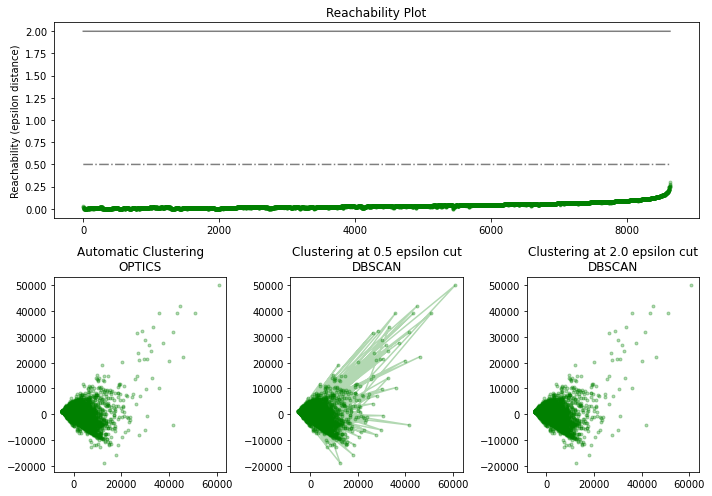

clusters: 7, not classified: 0.15


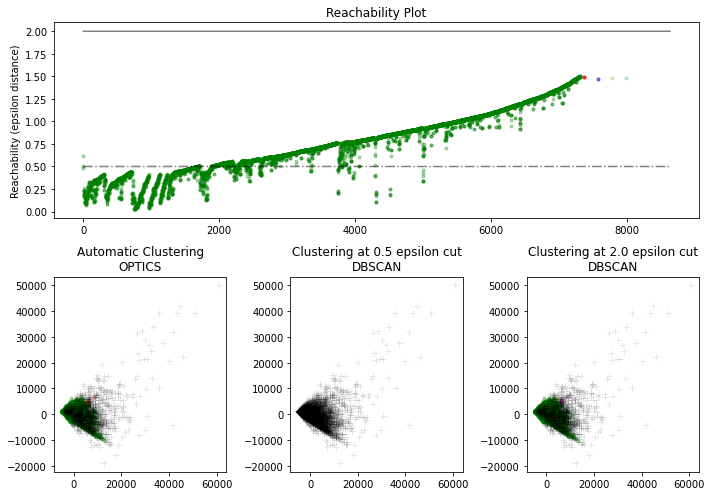

clusters: 23, not classified: 0.67


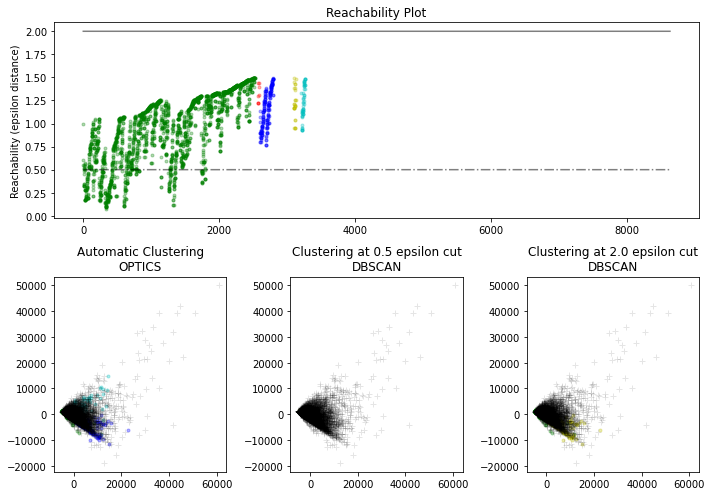

clusters: 2, not classified: 0.04


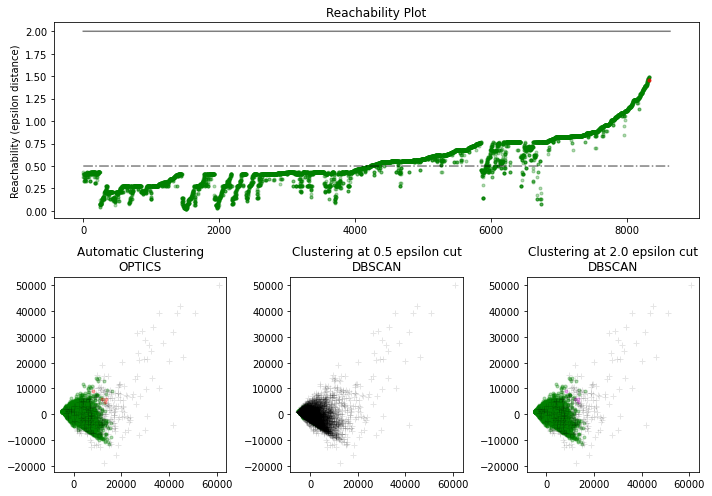

clusters: 12, not classified: 0.57


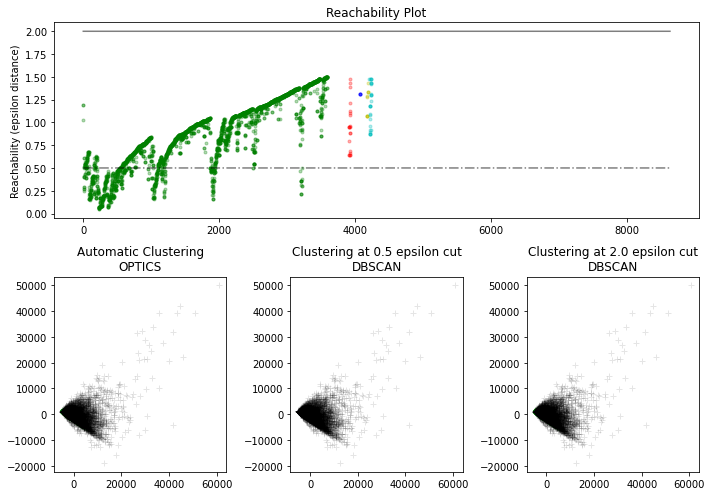

In [22]:
metrics = ['cosine', 'euclidean', 'canberra', 'chebyshev', 'cityblock']
for metric in metrics:
    clust = OPTICS(max_eps=1.5, min_samples=5, n_jobs=-1, cluster_method="dbscan", metric=metric).fit(scaled_data)
    num_of_clusters = len(set(clust.labels_)) - 1
    not_classified = list(clust.labels_).count(-1) / len(list(clust.labels_))
    print('clusters: {}, not classified: {:.2f}'.format(num_of_clusters, not_classified))
    show_optics(clust)